# 3D Local thickness

author: Felipe Delestro (fima@dtu.dk)

Based on the local thickness algorithmn by Vedrana Andersen Dahl (vand@dtu.dk)

https://github.com/vedranaa/local-thickness

In [33]:
import numpy as np
import qim3d
import localthickness as lt
import matplotlib.pyplot as plt
import time

## Helper functions

In [23]:
def show_slices(vol, nslices=5):
    fig, axs = plt.subplots(ncols=nslices, nrows=1, figsize=(nslices*3, 8))
    
    slice_idxs = (np.linspace(0, len(vol), num=nslices, endpoint=False)).astype(int)

    for idx, slice_idx in enumerate(slice_idxs):
        axs[idx].imshow(vol[slice_idx], interpolation="nearest")
        axs[idx].axis('off')
        axs[idx].set_title(f"slice {slice_idx}", fontsize=8)
            
    plt.show()
    
def plot_histogram(vol_lt):
    # Ignore zero thickness
    non_zero_values = vol_lt[vol_lt > 0]

    # Calculate histogram
    vol_hist, bin_edges = np.histogram(non_zero_values, bins=16)

    # Plot histogram
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(bin_edges[:-1], vol_hist, width=np.diff(bin_edges), ec="white", align="edge")

    # Adjustments
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_yscale("log")
    
    plt.show()


## Load data

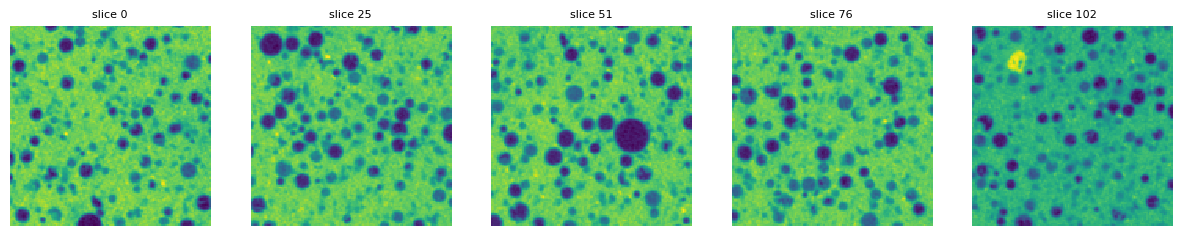

In [13]:
# Load the data using the qim3d data loader
vol = qim3d.io.load("../resources/img3d/cement_128x128x128.tif")
show_slices(vol)

## Threshold the volume
The Local thickness algorithm expects a binary input

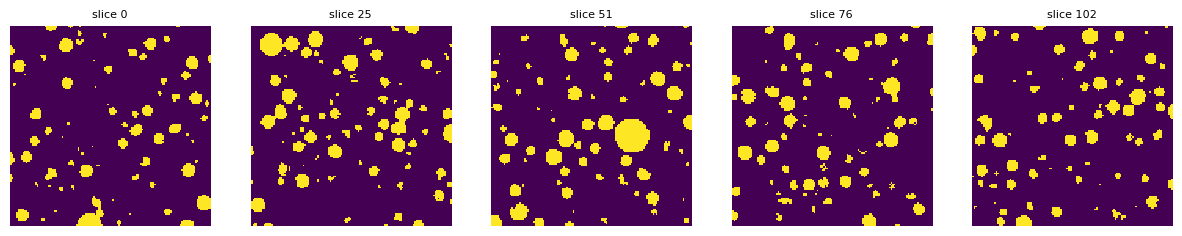

In [14]:
vol = vol < 64  # Values lower than the threshold will be set to True (foreground)
show_slices(vol)

## Local thickness

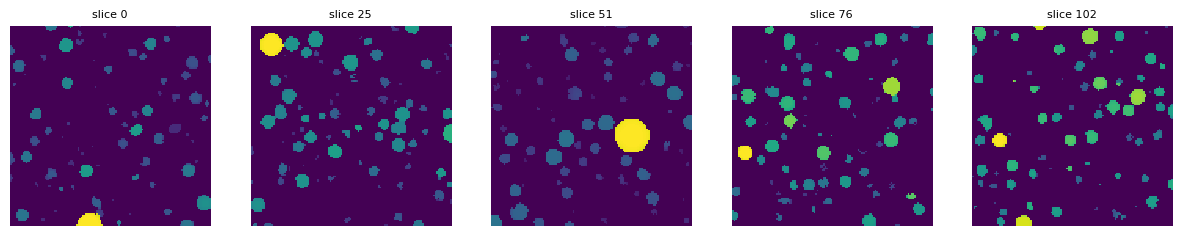

In [21]:
vol_lt = lt.local_thickness(vol, scale=1.0)
show_slices(vol_lt)

### Check histogram

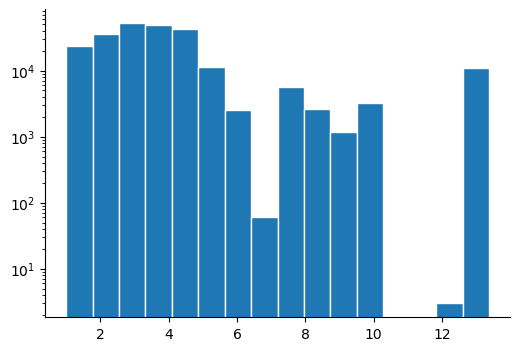

In [24]:
plot_histogram(vol_lt)

## Check effect of the scale parameter




Scale: 1.000
Process done in 1.245 seconds


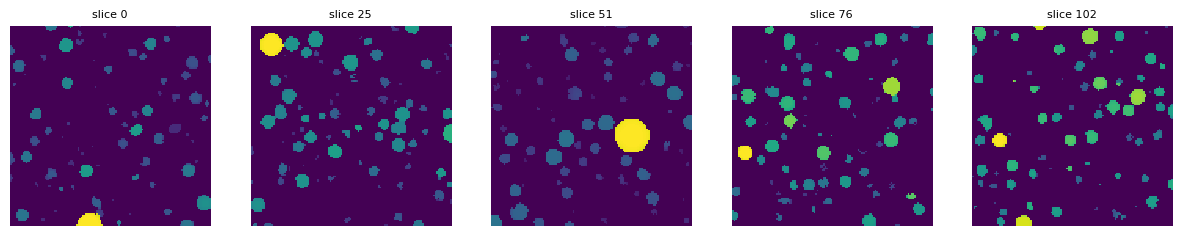

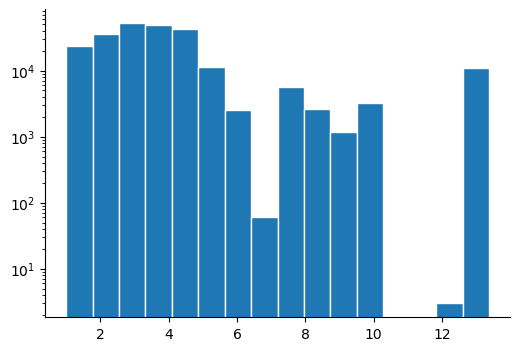




Scale: 0.800
Process done in 0.900 seconds


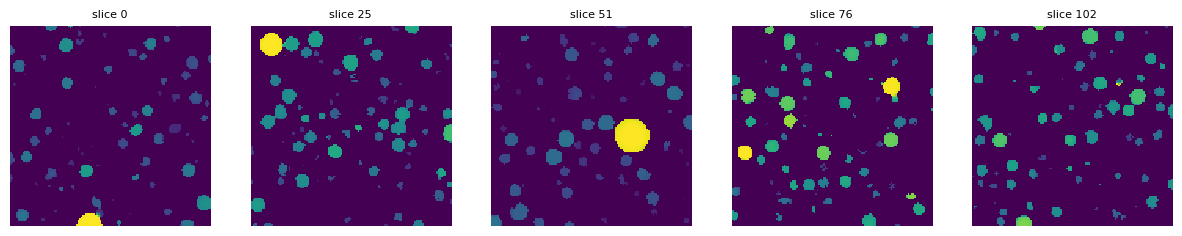

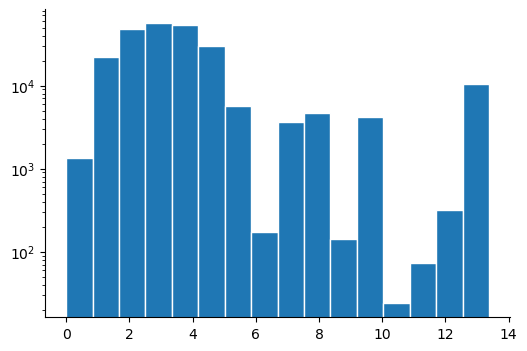




Scale: 0.600
Process done in 0.536 seconds


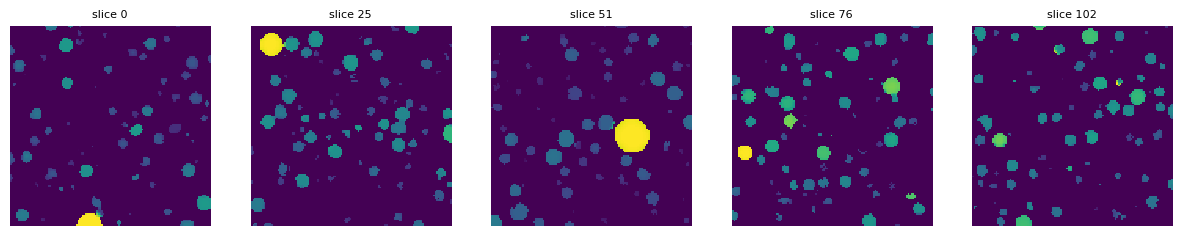

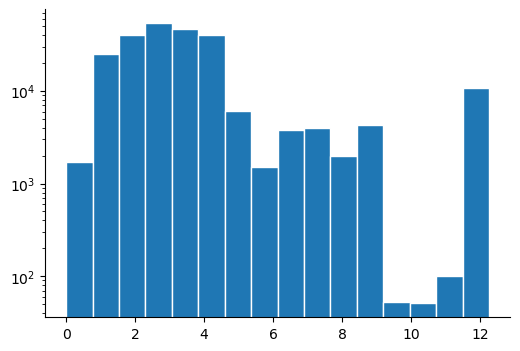




Scale: 0.400
Process done in 0.400 seconds


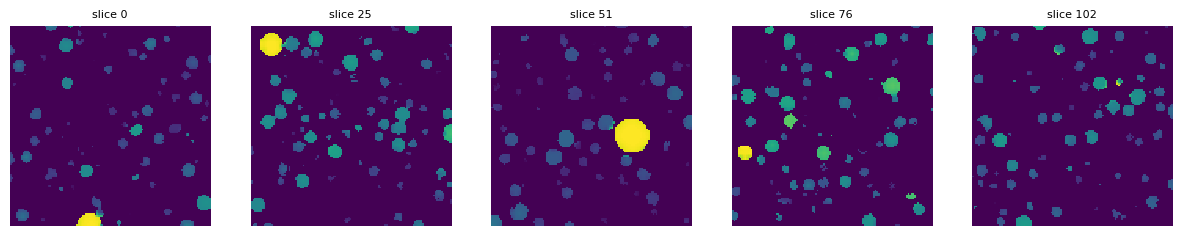

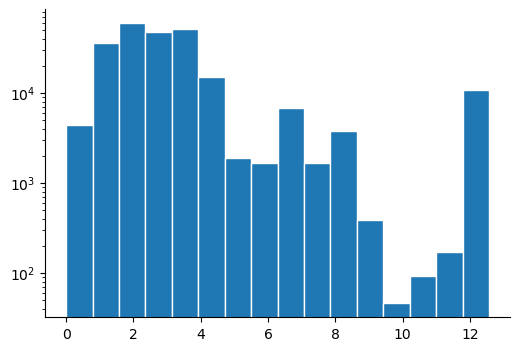




Scale: 0.200
Process done in 0.353 seconds


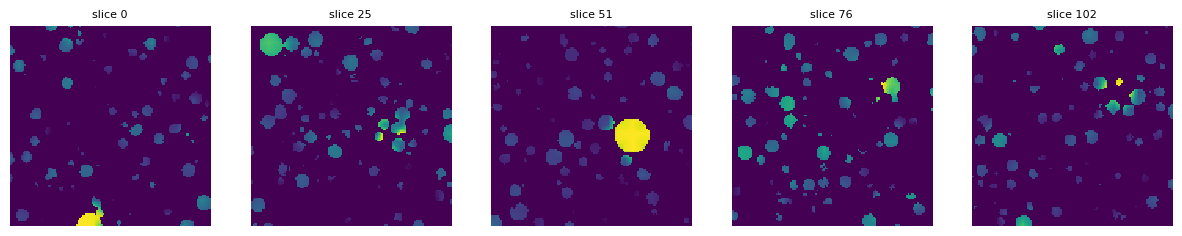

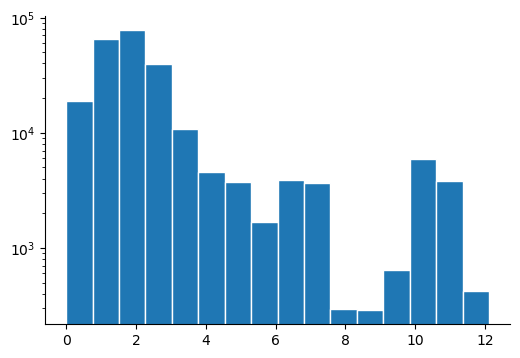

In [41]:
nscales = 5

for scale in np.linspace(1.0, 0.0, num=nscales, endpoint=False):
    start_time = time.time()
    print(f"\n\n\nScale: {scale:.3f}")
    vol_lt = lt.local_thickness(vol, scale=scale)
    print(f"Process done in {(time.time() - start_time):.3f} seconds")
    
    show_slices(vol_lt)
    plot_histogram(vol_lt) 
